# 통계

## 무작위성 검정

A 쇼핑몰은 새로운 브랜드 런칭 이벤트를 지원하기 위하여 매장 방문 고객에게 상품 1만원권을 배포하였다. 매장 오픈 후 최초 20명의 방문이력을 조사한 결과 아래의 순서로 멤버십을 소지한 사람(1)과 소지하지 않은 사람(0)이 방문하였다. A 쇼핑몰의 CRM 팀에서는 이러한 마케팅 행사가 한쪽에 치우치지 않고 공정하게 이루어졌는지를 판단하기 위해 무작위성 검정을 진행하고자 한다. 

**1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0** 

이 문제를 위한 가설을 설정하고 검정하시오.

In [1]:
from statsmodels.sandbox.stats.runs import Runs
import numpy as np

x = [1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0]
x = np.array(x)

Runs(x).runs_test()

(-1.8277470669267506, 0.06758752074917526)

-1.8은 z값을 의미하고, p 값은 0.067로 도출됨으로 유의수준 0.1 수준에서 유의하다.
즉, 연구가설을 채택하는데, 이 말의 함의는 공정하게 이루어지지 않았음을 의미

## 두 변수의 비교

### 　

A 쇼핑 마케팅 팀에서는 새로운 로열티 프로그램을 제공하며 멤버십 기능을 강화하였다. 로열티 프로그램 만족도의 변화가 통계적으로 유의한 지 알아보기 위해 도입 전과 후의 고객만족도에 대한 검정을 수행하고자 한다.

**사용데이터 : Ashopping.csv    **
- encoding="CP949" 

이 문제를 위한 가설을 설정하고 검정하시오.

In [9]:
import pandas as pd
df = pd.read_csv('Ashopping.csv', encoding='CP949')

In [13]:
df.head()

,고객ID,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도
0,1,5,7
1,2,2,3
2,3,6,6
3,4,3,5
4,5,5,6


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   고객ID              1000 non-null   int64
 1   멤버쉽_프로그램_가입전_만족도  1000 non-null   int64
 2   멤버쉽_프로그램_가입후_만족도  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [17]:
from scipy import stats

print(stats.shapiro(df['멤버쉽_프로그램_가입전_만족도']))
print(stats.shapiro(df['멤버쉽_프로그램_가입후_만족도']))

ShapiroResult(statistic=0.9328833818435669, pvalue=8.847756476414465e-21)
ShapiroResult(statistic=0.8878732919692993, pvalue=2.6420671186106034e-26)


In [33]:
print(stats.kstest(df['멤버쉽_프로그램_가입전_만족도'], 'norm'))
print(stats.kstest(df['멤버쉽_프로그램_가입후_만족도'], 'norm'))

KstestResult(statistic=0.9772498680518208, pvalue=0.0)
KstestResult(statistic=0.9986501019683699, pvalue=0.0)


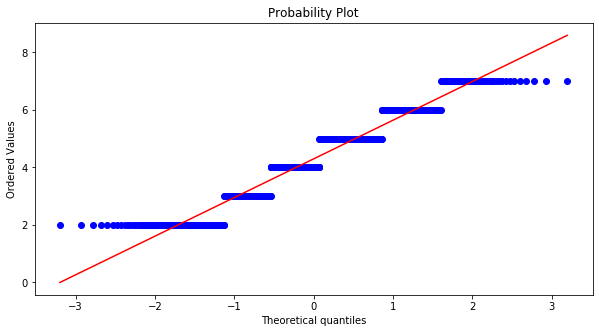

In [28]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,5))
# stats.probplot(df['멤버쉽_프로그램_가입전_만족도'], dist='norm', plot=plt)
# plt.show()

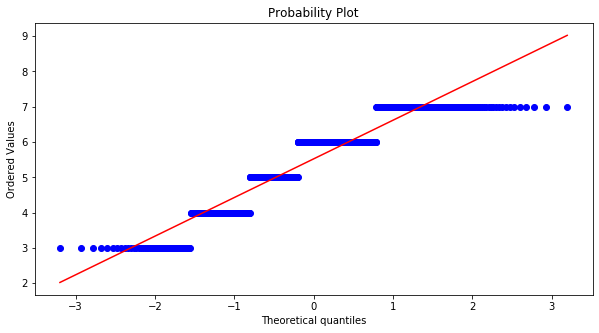

In [30]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,5))
# stats.probplot(df['멤버쉽_프로그램_가입후_만족도'], dist='norm', plot=plt)
# plt.show()

In [34]:
stats.ttest_rel(df['멤버쉽_프로그램_가입전_만족도'], df['멤버쉽_프로그램_가입후_만족도'])

Ttest_relResult(statistic=-29.560410783358122, pvalue=1.7319140513197275e-138)

### 　

전자회사 C사는 기존의 물류 알고리즘보다 개선되었다고 알려진 새로운 물류 경로 최적화 알고리즘을 도입해 상품의 배송시간을 단축하고자 한다. 이에 전국 7개의 물류센터에 실험적으로 적용해보고 실제로 얼마나 더 나은 성과를 보이는지 검증해보고자 한다. 전국 7개의 물류센터에서 새로운 알고리즘의 적용 전 평균 배송시간과 적용 후의 평균 배송시간은 다음과 같다. 

|물류센터|기존 알고리즘|신규 알고리즘|
|---|---|---|
|1|10|8|
|2|30|27|
|3|9|16|
|4|21|25|
|5|35|30|
|6|12|13|
|7|17|11|

이 문제를 위한 가설을 설정하고 검정하시오.

In [37]:
stats.ttest_rel([10,30,9,21,35,12,17], [9,27,16,25,30,13,11])

Ttest_relResult(statistic=0.23841582427170785, pvalue=0.8194925152000139)

## 세 변수의 비교

### 　

A 쇼핑에서는 VIP 고객들을 대상으로 새로운 혜택을 제공하고자 한다. 샘플증정, 포인트 추가, 무료배송, 할인쿠폰 등 4가지 혜택에 대한 5개 지역별 고객들에 대한 사전 선호도 조사를 실시한 결과 지역별 서비스에 대한 서열은 아래 표와 같이 정리되었다. 혜택 별 고객 선호도에 차이가 있는지를 검정을 통해 알아보자. 

|지역|샘플증정|포인트추가|무료배송|할인쿠폰|
|---|---|---|---|---|
|서울경기|1|3|2|4|
|강원|2|3|4|1|
|충청|1|3|4|2|
|경상|1|2|4|3|
|전라|2|1|3|4|

이 문제를 위한 가설을 설정하고 검정하시오.

In [38]:
stats.kruskal([1,2,1,1,2],[3,3,3,2,1],[2,4,4,4,3],[4,1,2,3,4])

KruskalResult(statistic=8.055999999999997, pvalue=0.044868421607416054)

통계적으로 유의한 차이가 있음

### 　

공장 종류(A,B,C,D)에 따라서 공장 설비(높이, 캐노피 면적)에 차이가 발생하는 지 알아보자.

In [39]:
#해당 코드를 실행하면 데이터가 로드됩니다. 

df=pd.read_csv("https://reneshbedre.github.io/assets/posts/ancova/manova_data.csv")

이 문제를 위한 가설을 설정하고 검정하시오.

In [41]:
df.head()

,plant_var,height,canopy_vol
0,A,20.0,0.70
1,A,22.0,0.80
2,A,24.0,0.95
3,A,18.0,0.60
4,A,20.0,0.74


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   plant_var   40 non-null     object 
 1   height      40 non-null     float64
 2   canopy_vol  40 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [53]:
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

print(stats.f_oneway(df[df['plant_var']=='A']['height'], df[df['plant_var']=='B']['height'], 
               df[df['plant_var']=='C']['height'], df[df['plant_var']=='D']['height']))

print(stats.f_oneway(df[df['plant_var']=='A']['canopy_vol'], df[df['plant_var']=='B']['canopy_vol'], 
               df[df['plant_var']=='C']['canopy_vol'], df[df['plant_var']=='D']['canopy_vol']))

F_onewayResult(statistic=116.68455249946784, pvalue=1.326405050434819e-18)
F_onewayResult(statistic=34.90929460580913, pvalue=9.360446323525888e-11)


# 기계학습

사용 데이터 : creditcard.csv  
데이터 출처 : 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

제시된 데이터는 심한 불균형 형태를 띠고 있다.  

해당사항을 고려하여  

**1) 전처리하고  
2) 모델을 구현하고  
3) 적절한 평가지표를 선정하여 점수를 구하라**


|Target|Count|Percent|
|---|---|---|
|0|284315|99.83|
|1|492|0.17|


In [58]:
df = pd.read_csv('creditcard.csv')

In [60]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [65]:
from sklearn.cluster import OPTICS

obtics = OPTICS(min_samples=8, metric='euclidean')
df_pr = df.drop(['Class'], axis=1)

obtics_labels = obtics.fit_predict(df_pr)

df_pr['obtics_cluster'] = obtics_labels

# result = df.groupby(['target'])['obtics_cluster'].value_counts()
# print(result)

# visualize_cluster_plot(obtics, df, 'obtics_cluster', iscenter=False)

KeyboardInterrupt: 